**Classifying newswires: a multiclass classification example**

#Load the dataset

In [1]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
train_data.shape, test_data.shape

((8982,), (2246,))

In [3]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [4]:
# Decode newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decode_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)
print(decode_review)

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


Note: "0" - Padding. "1" - Start of sequence. "2" - Unknown.

#Prepare the data

**Encoding the integer sequence via multi-hot encoding**

In [5]:
import numpy as np

# TODO: implement the following function for multi-hot encoding for inputs
def vectorize_sequences(sequences, dimension=10000):
    X = np.zeros((len(sequences), dimension), dtype="float32")
    for i, seq in enumerate(sequences):
        X[i, np.array(seq)] = 1.0
    return X

x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)
x_train[0]


array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [6]:
# TODO: implement one-hot encoding for outputs
def to_one_hot(labels, dimension=46):
    Y = np.zeros((len(labels), dimension), dtype="float32")
    for i, lab in enumerate(labels):
        Y[i, lab] = 1.0
    return Y

y_train = to_one_hot(train_labels)
y_test  = to_one_hot(test_labels)


Note: it can also use the built-in function in Keras:
```
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
```



#Build the model

**Define the model**

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

# TODO: build DL NN model
model = keras.Sequential(
    [
        layers.Input(shape=(10000,)),
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(46, activation="softmax"),
    ]
)

**Compile the model**

In [9]:
# TODO: fill in the information for compiling the model
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)



#Validate the model

**Fit the model with a validation set**

In [10]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [11]:

# TODO: train the model
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
    verbose=2
)

Epoch 1/20
16/16 - 4s - 275ms/step - accuracy: 0.4551 - loss: 2.9026 - val_accuracy: 0.6290 - val_loss: 1.9651
Epoch 2/20
16/16 - 0s - 19ms/step - accuracy: 0.6906 - loss: 1.5967 - val_accuracy: 0.7120 - val_loss: 1.3825
Epoch 3/20
16/16 - 0s - 17ms/step - accuracy: 0.7539 - loss: 1.1767 - val_accuracy: 0.7370 - val_loss: 1.1836
Epoch 4/20
16/16 - 0s - 19ms/step - accuracy: 0.7939 - loss: 0.9557 - val_accuracy: 0.7630 - val_loss: 1.0825
Epoch 5/20
16/16 - 0s - 19ms/step - accuracy: 0.8265 - loss: 0.7897 - val_accuracy: 0.7730 - val_loss: 1.0155
Epoch 6/20
16/16 - 0s - 18ms/step - accuracy: 0.8563 - loss: 0.6623 - val_accuracy: 0.7930 - val_loss: 0.9554
Epoch 7/20
16/16 - 0s - 27ms/step - accuracy: 0.8814 - loss: 0.5552 - val_accuracy: 0.7940 - val_loss: 0.9470
Epoch 8/20
16/16 - 0s - 27ms/step - accuracy: 0.8996 - loss: 0.4664 - val_accuracy: 0.8070 - val_loss: 0.8907
Epoch 9/20
16/16 - 1s - 41ms/step - accuracy: 0.9143 - loss: 0.4006 - val_accuracy: 0.7960 - val_loss: 0.9196
Epoch 10/

**Plot the training and validation loss**

In [12]:
import matplotlib.pyplot as plt

def plot_training_validation_results(training_results, validation_results,
                                     title, ylabel):
  print("training: ", training_results)
  print("validation: ", validation_results)
  plt.clf()
  epochs = range(1, len(training_results)+1)
  plt.plot(epochs, training_results, "bo", label="Training")
  plt.plot(epochs, validation_results, "b", label="Validation")
  plt.xlabel("Epochs")
  plt.ylabel(ylabel)
  plt.legend()
  plt.show()

training:  [2.90256404876709, 1.5966852903366089, 1.176675796508789, 0.9556851983070374, 0.7897471189498901, 0.662266731262207, 0.5552015900611877, 0.4663635492324829, 0.4005506634712219, 0.34202447533607483, 0.2933281362056732, 0.25830867886543274, 0.22837786376476288, 0.20491336286067963, 0.18588683009147644, 0.17464852333068848, 0.16412453353405, 0.1507817804813385, 0.14330710470676422, 0.1405271589756012]
validation:  [1.9650822877883911, 1.3825041055679321, 1.1836256980895996, 1.0824896097183228, 1.015493392944336, 0.9553910493850708, 0.9470191597938538, 0.8906583786010742, 0.9195551872253418, 0.908184826374054, 0.8665269613265991, 0.899154782295227, 0.9136773347854614, 0.9442816376686096, 0.9104035496711731, 0.9252799153327942, 0.8980181813240051, 0.9198923707008362, 0.9833210706710815, 0.9488667845726013]


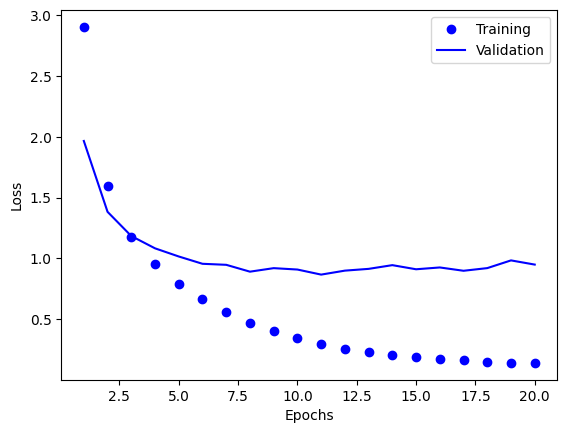

In [13]:
history_dict = history.history
training_loss_values = history_dict["loss"]
validation_loss_values = history_dict["val_loss"]
plot_training_validation_results(training_loss_values, validation_loss_values,
                                 "Training and validation loss", "Loss")

training:  [0.4551490843296051, 0.6905537247657776, 0.7539463639259338, 0.7939112782478333, 0.8264845609664917, 0.8563016653060913, 0.8813580274581909, 0.8996492028236389, 0.914307177066803, 0.9293410181999207, 0.9377349019050598, 0.9428714513778687, 0.947256326675415, 0.9492608308792114, 0.9516412019729614, 0.9527687430381775, 0.9532698392868042, 0.9564018845558167, 0.9590328335762024, 0.9564018845558167]
validation:  [0.6290000081062317, 0.7120000123977661, 0.7369999885559082, 0.7630000114440918, 0.7730000019073486, 0.7929999828338623, 0.7940000295639038, 0.8069999814033508, 0.7960000038146973, 0.8130000233650208, 0.8259999752044678, 0.8029999732971191, 0.8069999814033508, 0.7979999780654907, 0.8199999928474426, 0.8069999814033508, 0.8159999847412109, 0.8109999895095825, 0.7960000038146973, 0.8090000152587891]


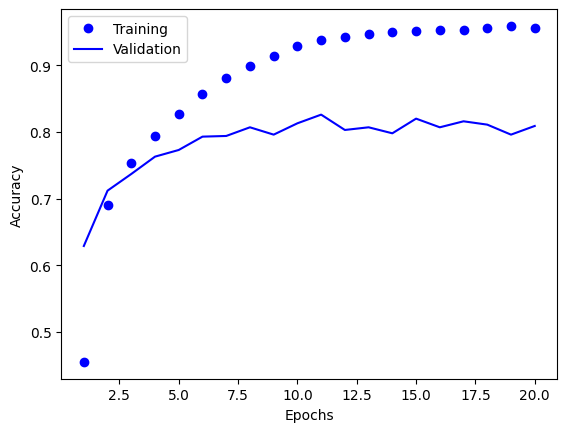

In [14]:
training_acc = history_dict["accuracy"]
validation_acc = history_dict["val_accuracy"]
plot_training_validation_results(training_acc, validation_acc,
                                 "Training and validation accuracy",
                                 "Accuracy")

**Refine the model**

In [16]:
# If you already trained once and have a `history` object:
import numpy as np

if "history" in locals():
    val_losses = history.history["val_loss"]
    best_epoch = int(np.argmin(val_losses)) + 1
    print("Best epoch by validation loss:", best_epoch)
else:
    best_epoch = 10  # fallback default if you restarted runtime
    print("No history found — using default best_epoch =", best_epoch)


Best epoch by validation loss: 11


In [17]:
# TODO: build DL NN model
model = keras.Sequential(
    [
        layers.Input(shape=(10000,)),
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(46, activation="softmax"),
    ]
)

# TODO: fill in the information for compiling the model
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# TODO: train the model using the best epoch
model.fit(
    x_train,
    y_train,
    epochs=best_epoch,
    batch_size=512,
    verbose=2
)

model.predict(x_test)
results = model.evaluate(x_test, y_test, verbose=0)
print(results)


Epoch 1/11
18/18 - 2s - 123ms/step - accuracy: 0.4627 - loss: 2.7314
Epoch 2/11
18/18 - 0s - 13ms/step - accuracy: 0.6942 - loss: 1.4991
Epoch 3/11
18/18 - 0s - 14ms/step - accuracy: 0.7611 - loss: 1.1357
Epoch 4/11
18/18 - 0s - 16ms/step - accuracy: 0.8036 - loss: 0.9158
Epoch 5/11
18/18 - 0s - 13ms/step - accuracy: 0.8368 - loss: 0.7542
Epoch 6/11
18/18 - 0s - 16ms/step - accuracy: 0.8624 - loss: 0.6249
Epoch 7/11
18/18 - 0s - 13ms/step - accuracy: 0.8889 - loss: 0.5189
Epoch 8/11
18/18 - 0s - 14ms/step - accuracy: 0.9066 - loss: 0.4352
Epoch 9/11
18/18 - 0s - 16ms/step - accuracy: 0.9168 - loss: 0.3732
Epoch 10/11
18/18 - 0s - 13ms/step - accuracy: 0.9289 - loss: 0.3199
Epoch 11/11
18/18 - 0s - 17ms/step - accuracy: 0.9377 - loss: 0.2794
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
[0.9334105849266052, 0.7916295528411865]


#Predict new data

In [18]:
model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[2.1278769e-05, 8.7913822e-06, 4.7230897e-05, ..., 8.6629134e-06,
        2.6136649e-06, 1.5558008e-07],
       [1.7057953e-02, 4.7467079e-02, 2.3765611e-03, ..., 7.1814604e-04,
        2.2810709e-04, 1.0622271e-03],
       [4.2560478e-03, 8.6768323e-01, 1.5473968e-03, ..., 2.6298907e-05,
        3.8202317e-04, 1.8246279e-03],
       ...,
       [6.5794811e-05, 8.0776174e-04, 1.6943163e-04, ..., 8.5122756e-06,
        3.7904261e-05, 9.2456385e-06],
       [8.6615956e-04, 1.4557586e-02, 7.9592352e-04, ..., 1.4517683e-04,
        1.4803637e-04, 1.4983326e-04],
       [9.3243475e-04, 2.0976339e-01, 1.3832268e-02, ..., 3.1235184e-05,
        6.6961351e-05, 6.2907515e-03]], dtype=float32)

In [19]:
results = model.evaluate(x_test, y_test)
print(results)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7964 - loss: 0.9169
[0.9334105849266052, 0.7916295528411865]


#Other experiments

##Consider the baseline

In [20]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

np.float64(0.1731967943009795)

In [21]:
results = np.zeros(46)
for label in test_labels:
  results[label] += 1
print(results)
print(max(results))
print(max(results) / sum(results))

[ 12. 105.  20. 813. 474.   5.  14.   3.  38.  25.  30.  83.  13.  37.
   2.   9.  99.  12.  20. 133.  70.  27.   7.  12.  19.  31.   8.   4.
  10.   4.  12.  13.  10.   5.   7.   6.  11.   2.   3.   5.  10.   8.
   3.   6.   5.   1.]
813.0
0.3619768477292965


In [22]:
results = np.zeros(46)
for label in train_labels:
  results[label] += 1
print(results)
print(max(results))
print(max(results) / sum(results))

[  55.  432.   74. 3159. 1949.   17.   48.   16.  139.  101.  124.  390.
   49.  172.   26.   20.  444.   39.   66.  549.  269.  100.   15.   41.
   62.   92.   24.   15.   48.   19.   45.   39.   32.   11.   50.   10.
   49.   19.   19.   24.   36.   30.   13.   21.   12.   18.]
3159.0
0.3517034068136273
